In [147]:
# Import required libraries / 导入所需库
import pandas as pd

# Specify file path / 指定文件路径
file_path = 'temperature_rain_dataset_with_missing_values.tsf'

# Read and display the first few lines of the data to check the structure
# 读取并显示数据的前几行以检查文件格式
# Since the file format might be custom, we read line by line and inspect manually
# 由于文件可能是特殊格式，我们逐行读取并手动检查
with open(file_path, 'r') as file:
    # Read all lines of the file / 读取文件的所有行
    lines = file.readlines()

# Display the first 10 lines to understand the file structure
# 打印前10行，以检查文件结构
for line in lines[:30]:
    print(line.strip())


# Dataset Information
# This dataset contains various daily temperature observations and rain forecasts, gathered by the Australian Bureau of Meteorology for 422 weather stations across Australia (station data can be seen at the links below), between 2015-05-02 and 2017-04-26.
# For each station the following attributes are available as equal length time series (725 days).
# 	T_MEAN (mean temperature in Celcius over the 24-hour period)
# 	PRCP_SUM (total rainfall in mm over the 24-hour period)
# 	T_MAX (max temperature in Celcius over the 24-hour period)
# 	T_MIN (min temperature in celcius over the 24-hour period)
# 	fcst_{fcstLead}_{fcstParameter}
# 		fcstLead refers to the lead days of the forecast
# 		fcstParameter refers to the parameter being forecast, see more details for the exact nature of the forecast parameters
# 		eg. fcst_0_DailyPoP for the timestamp 2016-05-26 15:00:00 refers to the percentage odds rainfall over .2mm, forecasted on the 2016-05-26 for the 24-hour window va

In [148]:
# Import necessary library / 导入所需库
import pandas as pd

# Initialize variables for data processing / 初始化用于数据处理的变量
data = []
data_started = False  # Flag to detect start of data / 标记数据开始的标识

# Process each line in the file / 逐行处理文件内容
for line in lines:
    line = line.strip()  # Remove any extra spaces / 去除多余空格
    # Start reading data after @data line / 在@data行后开始读取数据
    if line == "@data":
        data_started = True
        continue
    # If data has started, split line and add to data list
    # 若数据部分已开始，将该行数据分隔后加入data列表
    if data_started:
        data.append(line.split(":"))

# Convert the data to a DataFrame for further analysis
# 将数据转换为DataFrame以便进一步分析
df = pd.DataFrame(data, columns=["Series_ID", "Station_ID", "Variable", "Start_Timestamp", "Values"])

# Display the first few rows to check the loaded data / 显示前几行检查数据加载情况
df.head()


,Series_ID,Station_ID,Variable,Start_Timestamp,Values
0,T0,1006,T_MEAN,2015-05-02 15-00-00,"24.79167,25.11667,26.84167,27.87917,28.34167,2..."
1,T1,1006,PRCP_SUM,2015-05-02 15-00-00,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...."
2,T2,1006,T_MAX,2015-05-02 15-00-00,"35.8,36.6,38.7,38.6,35.9,33.6,33.8,34.5,34.7,3..."
3,T3,1006,T_MIN,2015-05-02 15-00-00,"15.7,15.3,16.7,18.8,20.9,20.1,15.9,16.9,17.2,1..."
4,T4,1006,fcst_0_DailyPoP,2015-05-02 15-00-00,"0.0,0.0,0.0,0.0,0.0,?,0.0,0.0,0.0,0.0,0.0,0.0,..."


In [150]:
# Import necessary libraries / 导入必要的库
import numpy as np

# Function to convert the Values column from string to list of floats
# 定义函数，将Values列从字符串转换为浮点数列表
def parse_values(value_str):
    # Replace missing values denoted by '?' with NaN and convert to list of floats
    # 将'?'替换为NaN，并转换为浮点数列表
    return [float(v) if v != '?' else np.nan for v in value_str.split(",")]

# Apply the parsing function to the Values column
# 将解析函数应用于Values列
df["Values"] = df["Values"].apply(parse_values)

# Convert Start_Timestamp to datetime
# 将Start_Timestamp转换为日期格式
df["Start_Timestamp"] = pd.to_datetime(df["Start_Timestamp"], format='%Y-%m-%d %H-%M-%S')

# Display the cleaned data / 显示清洗后的数据
df.head()


,Series_ID,Station_ID,Variable,Start_Timestamp,Values
0,T0,1006,T_MEAN,2015-05-02 15:00:00,"[24.79167, 25.11667, 26.84167, 27.87917, 28.34..."
1,T1,1006,PRCP_SUM,2015-05-02 15:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,T2,1006,T_MAX,2015-05-02 15:00:00,"[35.8, 36.6, 38.7, 38.6, 35.9, 33.6, 33.8, 34...."
3,T3,1006,T_MIN,2015-05-02 15:00:00,"[15.7, 15.3, 16.7, 18.8, 20.9, 20.1, 15.9, 16...."
4,T4,1006,fcst_0_DailyPoP,2015-05-02 15:00:00,"[0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, ..."


In [152]:
# Calculate the count of each variable and the number of time series entries for each variable
variable_counts = df['Variable'].value_counts()

# Display the total number of unique variables and the count of time series for each variable
num_variables = len(variable_counts)
print(f"Total unique variables: {num_variables}")
print("Count of time series for each variable:")
print(variable_counts)


Total unique variables: 76
Count of time series for each variable:
Variable
T_MEAN                     422
fcst_3_DailyPrecip10Pct    422
fcst_4_DailyPoP15          422
fcst_4_DailyPoP10          422
fcst_4_DailyPoP1           422
                          ... 
fcst_1_DailyPrecip10Pct    422
fcst_1_DailyPrecip         422
fcst_1_DailyPoP50          422
fcst_1_DailyPoP5           422
fcst_5_DailyPrecip75Pct    422
Name: count, Length: 76, dtype: int64


In [153]:
# Retrieve all unique variable names and station IDs
unique_variables = df['Variable'].unique()
unique_stations = df['Station_ID'].unique()

# Print the variable names and station IDs
print("Unique Variables:")
print(unique_variables)
print("\nUnique Stations:")
print(unique_stations)


Unique Variables:
['T_MEAN' 'PRCP_SUM' 'T_MAX' 'T_MIN' 'fcst_0_DailyPoP' 'fcst_0_DailyPoP1'
 'fcst_0_DailyPoP10' 'fcst_0_DailyPoP15' 'fcst_0_DailyPoP25'
 'fcst_0_DailyPoP5' 'fcst_0_DailyPoP50' 'fcst_0_DailyPrecip'
 'fcst_0_DailyPrecip10Pct' 'fcst_0_DailyPrecip25Pct'
 'fcst_0_DailyPrecip50Pct' 'fcst_0_DailyPrecip75Pct' 'fcst_1_DailyPoP'
 'fcst_1_DailyPoP1' 'fcst_1_DailyPoP10' 'fcst_1_DailyPoP15'
 'fcst_1_DailyPoP25' 'fcst_1_DailyPoP5' 'fcst_1_DailyPoP50'
 'fcst_1_DailyPrecip' 'fcst_1_DailyPrecip10Pct' 'fcst_1_DailyPrecip25Pct'
 'fcst_1_DailyPrecip50Pct' 'fcst_1_DailyPrecip75Pct' 'fcst_2_DailyPoP'
 'fcst_2_DailyPoP1' 'fcst_2_DailyPoP10' 'fcst_2_DailyPoP15'
 'fcst_2_DailyPoP25' 'fcst_2_DailyPoP5' 'fcst_2_DailyPoP50'
 'fcst_2_DailyPrecip' 'fcst_2_DailyPrecip10Pct' 'fcst_2_DailyPrecip25Pct'
 'fcst_2_DailyPrecip50Pct' 'fcst_2_DailyPrecip75Pct' 'fcst_3_DailyPoP'
 'fcst_3_DailyPoP1' 'fcst_3_DailyPoP10' 'fcst_3_DailyPoP15'
 'fcst_3_DailyPoP25' 'fcst_3_DailyPoP5' 'fcst_3_DailyPoP50'
 'fcst_3_Dai

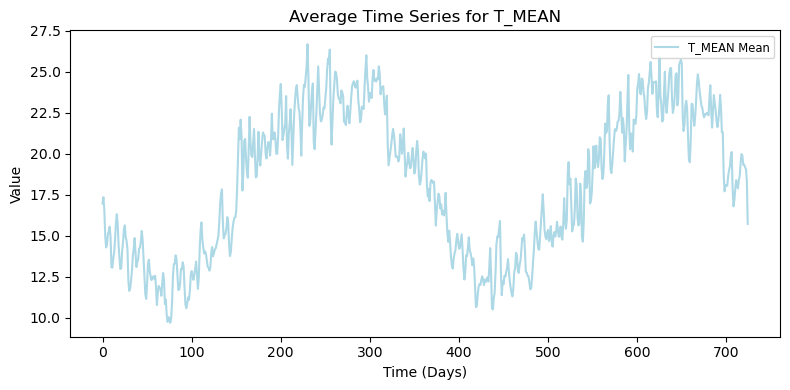

In [154]:
# Visualize the average time series of selected variables ('T_MEAN', 'PRCP_SUM', 'T_MAX', 'T_MIN') across all stations
# 可视化选定变量（'T_MEAN'，'PRCP_SUM'，'T_MAX'，'T_MIN'）在所有站点的平均时间序列

import matplotlib.pyplot as plt
import numpy as np

# List of variables to visualize / 要可视化的变量列表
# selected_variables = ['T_MEAN', 'PRCP_SUM', 'T_MAX', 'T_MIN']
selected_variables = ['T_MEAN']

# Initialize plot
plt.figure(figsize=(8, 4))

# Loop through each selected variable
# 遍历每个选定的变量
for i, variable in enumerate(selected_variables, 1):
    # Filter rows by variable and extract values
    # 过滤出当前变量的行并提取值
    values = df[df['Variable'] == variable]['Values']
    
    # Stack values from all stations and compute the mean along the time axis (axis=0)
    # 将所有站点的值堆叠并沿时间轴（axis=0）计算平均值
    stacked_values = np.vstack(values)
    mean_values = np.nanmean(stacked_values, axis=0)

    # Plot the mean time series for each variable
    # 绘制每个变量的平均时间序列
    plt.subplot(len(selected_variables), 1, i)
    plt.plot(mean_values, label=f"{variable} Mean", color='lightblue')
    plt.title(f"Average Time Series for {variable}")
    plt.ylabel('Value')
    plt.xlabel('Time (Days)')
    plt.legend(loc='upper right', fontsize='small')

# Adjust layout and display plot
# 调整布局并显示图形
plt.tight_layout()
plt.show()


In [155]:
# Ensure the timestamp column is in datetime format
df['Start_Timestamp'] = pd.to_datetime(df['Start_Timestamp'], format='%Y-%m-%d %H:%M:%S')

# Generate the complete time range, assuming daily frequency
full_time_range = pd.date_range(start=df['Start_Timestamp'].min(), 
                                end=df['Start_Timestamp'].max(), freq='D')

# Check if each Series_ID has missing timestamps
def check_and_fill_timestamps(series_df):
    # Get the existing time range for the current series
    existing_timestamps = series_df['Start_Timestamp']
    # Generate the complete time range
    all_timestamps = pd.DataFrame({'Start_Timestamp': full_time_range})
    # Merge the existing timestamps with the complete time range to fill missing timestamps
    merged = all_timestamps.merge(series_df, on='Start_Timestamp', how='left')
    return merged

# Group by Series_ID, Station_ID, and Variable, and process each group
df_filled = df.groupby(['Series_ID', 'Station_ID', 'Variable']).apply(check_and_fill_timestamps).reset_index(drop=True)

df_filled


C:\Users\User\AppData\Local\Temp\ipykernel_16256\1651702626.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df.groupby(['Series_ID', 'Station_ID', 'Variable']).apply(check_and_fill_timestamps).reset_index(drop=True)


,Start_Timestamp,Series_ID,Station_ID,Variable,Values
0,2015-05-02 15:00:00,T0,1006,T_MEAN,"[24.79167, 25.11667, 26.84167, 27.87917, 28.34..."
1,2015-05-02 15:00:00,T1,1006,PRCP_SUM,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2015-05-02 15:00:00,T10,1006,fcst_0_DailyPoP50,"[0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, ..."
3,2015-05-02 15:00:00,T100,1019,fcst_1_DailyPrecip10Pct,"[0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, ..."
4,2015-05-02 15:00:00,T1000,4090,fcst_0_DailyPrecip10Pct,"[6.54751, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0..."
...,...,...,...,...,...
32067,2015-05-02 15:00:00,T9995,23122,fcst_2_DailyPrecip75Pct,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
32068,2015-05-02 15:00:00,T9996,23122,fcst_3_DailyPoP,"[26.0, 22.0, 33.0, 50.0, 52.0, 38.0, 34.0, 10...."
32069,2015-05-02 15:00:00,T9997,23122,fcst_3_DailyPoP1,"[12.0, 11.0, 19.0, 34.0, 39.0, 18.0, 21.0, 6.0..."
32070,2015-05-02 15:00:00,T9998,23122,fcst_3_DailyPoP10,"[0.0, 0.0, 2.0, 5.0, 9.0, 1.0, 2.0, 1.0, 0.0, ..."


In [160]:
# Perform linear interpolation on the values in the time series
def interpolate_missing_values(series_df):
    # Explode the 'Values' column to convert list elements into separate rows
    exploded_values = series_df.explode('Values')
    # Use linear interpolation to fill missing values
    exploded_values['Values'] = exploded_values['Values'].astype(float).interpolate(method='linear', limit_direction='both')
    # Recombine the filled values back into lists
    series_df['Values'] = exploded_values.groupby(level=0)['Values'].apply(list)
    return series_df

# Apply interpolation to the time series for each Series_ID
df_filled_interpolated = df_filled.groupby(['Series_ID', 'Station_ID', 'Variable']).apply(interpolate_missing_values).reset_index(drop=True)

df_filled_interpolated


C:\Users\User\AppData\Local\Temp\ipykernel_16256\3798707059.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled_interpolated = df_filled.groupby(['Series_ID', 'Station_ID', 'Variable']).apply(interpolate_missing_values).reset_index(drop=True)


,Start_Timestamp,Series_ID,Station_ID,Variable,Values
0,2015-05-02 15:00:00,T0,1006,T_MEAN,"[24.79167, 25.11667, 26.84167, 27.87917, 28.34..."
1,2015-05-02 15:00:00,T1,1006,PRCP_SUM,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2015-05-02 15:00:00,T10,1006,fcst_0_DailyPoP50,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2015-05-02 15:00:00,T100,1019,fcst_1_DailyPrecip10Pct,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2015-05-02 15:00:00,T1000,4090,fcst_0_DailyPrecip10Pct,"[6.54751, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
...,...,...,...,...,...
32067,2015-05-02 15:00:00,T9995,23122,fcst_2_DailyPrecip75Pct,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
32068,2015-05-02 15:00:00,T9996,23122,fcst_3_DailyPoP,"[26.0, 22.0, 33.0, 50.0, 52.0, 38.0, 34.0, 10...."
32069,2015-05-02 15:00:00,T9997,23122,fcst_3_DailyPoP1,"[12.0, 11.0, 19.0, 34.0, 39.0, 18.0, 21.0, 6.0..."
32070,2015-05-02 15:00:00,T9998,23122,fcst_3_DailyPoP10,"[0.0, 0.0, 2.0, 5.0, 9.0, 1.0, 2.0, 1.0, 0.0, ..."


In [163]:
# Check the continuity of the time series
def check_timestamp_continuity(series_df):
    # Calculate the difference between consecutive timestamps
    timestamp_diff = series_df['Start_Timestamp'].diff().dropna()
    # Verify if all differences are equal to 1 day
    return (timestamp_diff == pd.Timedelta(days=1)).all()

# Verify continuity for all time series grouped by Series_ID
continuity_check = df_filled_interpolated.groupby(['Series_ID', 'Station_ID', 'Variable']).apply(check_timestamp_continuity)
print("Are all time series timestamps continuous:", continuity_check.all())

# Display some results after interpolation
print(df_filled_interpolated.head())


Are all time series timestamps continuous: True
      Start_Timestamp Series_ID Station_ID                 Variable  \
0 2015-05-02 15:00:00        T0       1006                   T_MEAN   
1 2015-05-02 15:00:00        T1       1006                 PRCP_SUM   
2 2015-05-02 15:00:00       T10       1006        fcst_0_DailyPoP50   
3 2015-05-02 15:00:00      T100       1019  fcst_1_DailyPrecip10Pct   
4 2015-05-02 15:00:00     T1000       4090  fcst_0_DailyPrecip10Pct   

                                              Values  
0  [24.79167, 25.11667, 26.84167, 27.87917, 28.34...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [6.54751, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...  


C:\Users\User\AppData\Local\Temp\ipykernel_16256\3066997775.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  continuity_check = df_filled_interpolated.groupby(['Series_ID', 'Station_ID', 'Variable']).apply(check_timestamp_continuity)


In [165]:
# Calculate the sequence length for each station
station_lengths = df_filled_interpolated.groupby("Station_ID")["Values"].apply(lambda x: len(x.iloc[0])).reset_index()

# Rename columns for better clarity
station_lengths.columns = ["Station_ID", "Sequence_Length"]

# Print the sequence length for each station
print("Sequence length for each station (T_MEAN):")
print(station_lengths)

# Save to a file if needed
# station_lengths.to_csv("station_sequence_lengths.csv", index=False)


Sequence length for each station (T_MEAN):
    Station_ID  Sequence_Length
0         1006              725
1         1019              725
2         1020              725
3        10286              725
4        10692              725
..         ...              ...
417       9965              725
418       9968              725
419       9977              725
420       9994              725
421       9998              725

[422 rows x 2 columns]


In [167]:
import pandas as pd
import random

# Redefine the function to check timestamp continuity
def check_timestamp_continuity(series_df):
    """
    Check if timestamps are continuous.
    :param series_df: DataFrame containing timestamps
    :return: Boolean indicating continuity
    """
    timestamp_diff = series_df['Start_Timestamp'].diff().dropna()
    return (timestamp_diff == pd.Timedelta(days=1)).all()

# Filter data for T_MEAN variable
t_mean_df = df_filled_interpolated[df_filled_interpolated['Variable'] == 'T_MEAN']

# Randomly select 100 stations
selected_stations = random.sample(list(t_mean_df['Station_ID'].unique()), 100)

# Filter data for the selected stations
selected_station_data = t_mean_df[t_mean_df['Station_ID'].isin(selected_stations)]

# Check the length of time series for each selected station
print("Time series lengths for selected stations:")
lengths = selected_station_data.groupby("Station_ID")["Values"].apply(lambda x: len(x.iloc[0]))
print(lengths)

# Check timestamp continuity for each selected station
print("\nTimestamp continuity for selected stations:")
continuity_check = selected_station_data.groupby("Station_ID").apply(
    lambda group: check_timestamp_continuity(group.sort_values("Start_Timestamp"))
)
print(continuity_check)

# Check for missing values in the time series for each selected station
print("\nCheck for missing values in selected stations:")
missing_check = selected_station_data.groupby("Station_ID")["Values"].apply(
    lambda x: any(pd.isna(v) for v in x.iloc[0])
)
print(missing_check)

# Display the complete time series data for a random station as an example
example_station = selected_stations[0]
example_data = selected_station_data[selected_station_data['Station_ID'] == example_station]
print(f"\nComplete time series for station {example_station}:")
print(example_data.iloc[0]['Values'])


Time series lengths for selected stations:
Station_ID
10286    725
10917    725
11052    725
13017    725
14142    725
        ... 
9519     725
97024    725
97072    725
9789     725
9977     725
Name: Values, Length: 100, dtype: int64

Timestamp continuity for selected stations:
Station_ID
10286    True
10917    True
11052    True
13017    True
14142    True
         ... 
9519     True
97024    True
97072    True
9789     True
9977     True
Length: 100, dtype: bool

Check for missing values in selected stations:
Station_ID
10286    False
10917    False
11052    False
13017    False
14142    False
         ...  
9519     False
97024    False
97072    False
9789     False
9977     False
Name: Values, Length: 100, dtype: bool

Complete time series for station 39128:
[19.69583, 21.22917, 20.89583, 21.825, 19.15833, 18.38333, 18.3, 16.3125, 16.7875, 17.72083, 18.25417, 14.29583, 16.125, 19.15833, 18.825, 19.42083, 19.87083, 19.575, 21.125, 17.55417, 16.72083, 17.84583, 18.0875, 18.32083, 

C:\Users\User\AppData\Local\Temp\ipykernel_16256\1513845495.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  continuity_check = selected_station_data.groupby("Station_ID").apply(


In [169]:
# Save the data to a CSV file
selected_station_data.to_csv('selected_station_data_100.csv', index=False, encoding='utf-8')

print("Data has been saved to 'selected_station_data_100.csv'.")


Data has been saved to 'selected_station_data_100.csv'.
